In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [35]:
from tensorflow.keras.datasets import imdb

In [36]:
(train_data,train_label),(test_data,test_label) = imdb.load_data(num_words=1000) 

In [37]:
train_data.shape

(25000,)

In [38]:
print(train_data[0])
print(len(train_data[0]))
max(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218


973

In [39]:
word_index = imdb.get_word_index()

In [40]:
reverse_word_index = { value:key for key,value in word_index.items()  }
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

##### we use get value because if there is no value occur we can set default value

In [41]:
decode_review = " ".join([ reverse_word_index.get(i-3,"?") for i in train_data[0]]) 

In [42]:
decode_review

"? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all"

In [43]:
for index, word in reverse_word_index.items():
    if word == "scenery":
        print(f"Index of 'counting' is: {index}")


Index of 'counting' is: 1382


In [44]:
word = "location"
original_index = 3 + [k for k, v in reverse_word_index.items() if v == word][0]

if original_index in train_data[0]:
    print(f"'{word}' is in the review at index {train_data[0].index(original_index)}")
else:
    print(f"'{word}' is NOT in the review.")


'location' is NOT in the review.


#### preparing the data




In [45]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [46]:
len(train_data[1])

189

#### Each row is a multi-hot encoded vector of word presence.


In [47]:
def vectorize_squence(sequence,dimension=10000):
    result = np.zeros((len(sequence),dimension))
    for i,sequence in enumerate(sequence):
        for j in sequence:
            result[i,j]=1

    return result 

In [48]:
X_train = vectorize_squence(train_data)
X_test = vectorize_squence(test_data)
type(train_label)

numpy.ndarray

In [49]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [50]:
len(X_train[0])

10000

In [51]:
y_train = np.asarray(train_label).astype(float)
y_test = np.asarray(test_label).astype(float)

#### Building Model

In [52]:
from tensorflow import keras
from keras import layers,models
model = keras.Sequential([
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid"),
    
])
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [53]:
X_val = X_train[:10000]
partial_x_train= X_train[10000:]
y_val = y_train[:10000]
partial_y_train= y_train[10000:]

In [54]:
history = model.fit(partial_x_train,partial_y_train,epochs=10,validation_data=(X_val,y_val))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.7797 - loss: 0.4884 - val_accuracy: 0.8539 - val_loss: 0.3410
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8671 - loss: 0.3204 - val_accuracy: 0.8611 - val_loss: 0.3347
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8729 - loss: 0.3043 - val_accuracy: 0.8600 - val_loss: 0.3328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8780 - loss: 0.2974 - val_accuracy: 0.8533 - val_loss: 0.3572
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8854 - loss: 0.2799 - val_accuracy: 0.8602 - val_loss: 0.3423
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8955 - loss: 0.2575 - val_accuracy: 0.8514 - val_loss: 0.3561
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9050 - loss: 0.2402 - val_accuracy: 0.8532 - val_loss: 0.3652
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9126 - loss: 0.2236 - val_accuracy

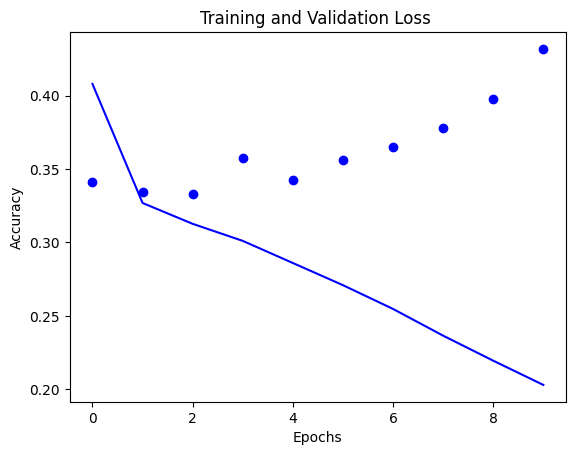

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"],"bo")
plt.title("Training and Validation Loss ")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [56]:
history_dict = history.history
print(history.history)

{'accuracy': [0.8273333311080933, 0.8638666868209839, 0.8697999715805054, 0.8748666644096375, 0.8826666474342346, 0.8896666765213013, 0.8974666595458984, 0.9089999794960022, 0.9145333170890808, 0.9256666898727417], 'loss': [0.408032089471817, 0.3268968164920807, 0.3126894533634186, 0.3010649085044861, 0.28598934412002563, 0.27088770270347595, 0.2546698749065399, 0.23646795749664307, 0.21941176056861877, 0.20290325582027435], 'val_accuracy': [0.8539000153541565, 0.8611000180244446, 0.8600000143051147, 0.8532999753952026, 0.8601999878883362, 0.8514000177383423, 0.8532000184059143, 0.854200005531311, 0.8514999747276306, 0.8490999937057495], 'val_loss': [0.3410179018974304, 0.33468955755233765, 0.33283478021621704, 0.35720816254615784, 0.34230953454971313, 0.3561058044433594, 0.3651558458805084, 0.37765997648239136, 0.3974311053752899, 0.43187880516052246]}


In [57]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<function matplotlib.pyplot.show(close=None, block=None)>

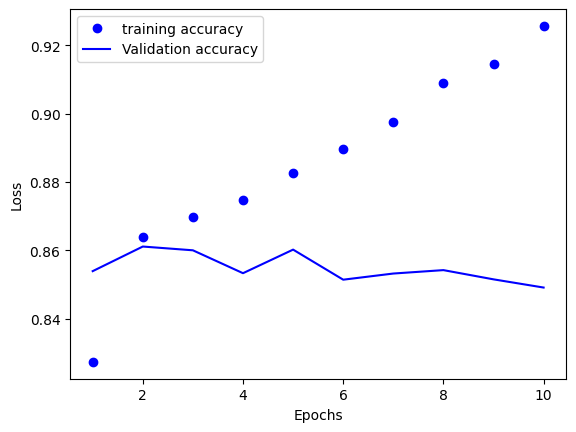

In [58]:
accuracy = history_dict["accuracy"]
val_acccuracy = history_dict["val_accuracy"]
epochs = range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,"bo",label ="training accuracy")
plt.plot(epochs,val_acccuracy,"b",label ="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show

#### Loss chart

<function matplotlib.pyplot.show(close=None, block=None)>

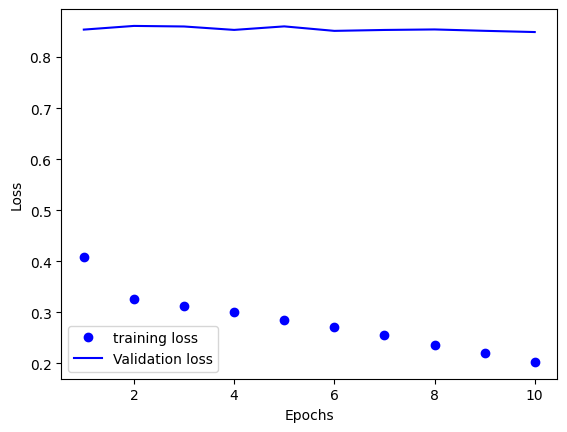

In [59]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,"bo",label ="training loss")
plt.plot(epochs,val_acccuracy,"b",label ="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show


In [60]:
perfect_model   = keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
]) 
perfect_model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])
perfect_model.fit(X_train,y_train,epochs=4,batch_size = 512)
result  = perfect_model.evaluate(X_test,y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.6774 - loss: 0.5839
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.8471 - loss: 0.3643
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8621 - loss: 0.3254
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8672 - loss: 0.3115
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8511 - loss: 0.3377


In [61]:
result

[0.33278369903564453, 0.8541600108146667]

In [62]:
perfect_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,578,884 (9.84 MB)

 Trainable params: 1,289,441 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,289,443 (4.92 MB)

In [ ]:
review = ["This movie is a masterpiece! The acting was superb, and the plot kept me on the edge of my seat." ]

### Preparing data 
    - Vectorization
    - standarization
    - tokinization
    - numerical vector

In [64]:
###text  standarization
review = review.lower()

In [ ]:
###text splitting tokenization
# in order to  more understing of  semantics we ngram 2gram 3gram 


### vocabulary indexing



In [67]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [73]:
import string

def standarize(text):
    text = text.lower()
    return "".join(char for char in text if char not in string.punctuation)

def tokenize(text):
    return text.split()
vocabulary = {}
for text in review:
    text = standarize(text)
    tokens = tokenize(text)
    for token in tokens:
        if token not in vocabulary:
            vocabulary[token] = len(vocabulary) 

vocabulary

{'this': 0,
 'movie': 1,
 'is': 2,
 'a': 3,
 'masterpiece': 4,
 'the': 5,
 'acting': 6,
 'was': 7,
 'superb': 8}

In [75]:
def one_hot_encoding(token):
    vector = np.zeros((len(vocabulary),))
    token_index = vocabulary[token]
    vector[token_index] = 1
    return vector

In [76]:
for t in tokens:
    print( {t},one_hot_encoding(t)  )

{'this'} [1. 0. 0. 0. 0. 0. 0. 0. 0.]
{'movie'} [0. 1. 0. 0. 0. 0. 0. 0. 0.]
{'is'} [0. 0. 1. 0. 0. 0. 0. 0. 0.]
{'a'} [0. 0. 0. 1. 0. 0. 0. 0. 0.]
{'masterpiece'} [0. 0. 0. 0. 1. 0. 0. 0. 0.]
{'the'} [0. 0. 0. 0. 0. 1. 0. 0. 0.]
{'acting'} [0. 0. 0. 0. 0. 0. 1. 0. 0.]
{'was'} [0. 0. 0. 0. 0. 0. 0. 1. 0.]
{'superb'} [0. 0. 0. 0. 0. 0. 0. 0. 1.]
